In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [2]:
chat = pd.read_csv('chat.csv')
video_play = pd.read_csv('video_play.csv')

In [3]:
chat.head()

,time,device_id,login,channel,country,player,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,NaN,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,NaN,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,2015-01-01 11:47:35,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,NaN,Dota 2


In [4]:
video_play.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False


Create shortened list of games and corresponding number of viewers for January 15, 2015

In [5]:
games = ['LoL', 'Dota 2', 'CS:GO', 'DayZ', 'HOS', 'Isaac', 'Shows', 'Hearth', 'WoT', 'Agar.io']
viewers = [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]

Plot bar graph of games and viewers

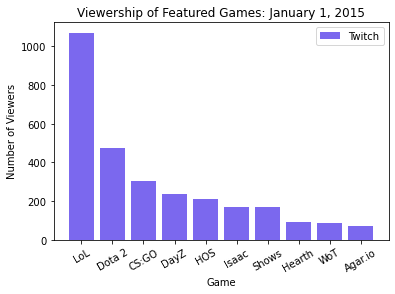

<Figure size 432x288 with 0 Axes>

In [6]:
plt.bar(range(len(games)), viewers, color = 'mediumslateblue')
plt.title('Viewership of Featured Games: January 1, 2015')
plt.xlabel('Game')
plt.ylabel('Number of Viewers')
plt.legend(['Twitch'])
ax = plt.subplot()
ax.set_xticks(range(len(games)))
ax.set_xticklabels(games, rotation = 30)
plt.show()
plt.clf()

Create lists of viewer countries and number of viewers for League of Legends

In [7]:
labels = ['US', 'DE', 'CA', 'N/A', 'GB', 'TR', 'BR', 'DK', 'PL', 'BE', 'NL', 'Others']
countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]

Create list of colors to correspond to each entry in labels and countries

In [8]:
colors = ['royalblue', 'gold', 'seagreen', 'firebrick', 'mediumslateblue', 'magenta', 'mediumspringgreen', 'indianred', 'aqua', 'orchid', 'dodgerblue', 'crimson']

Create a pie chart of viewers by country

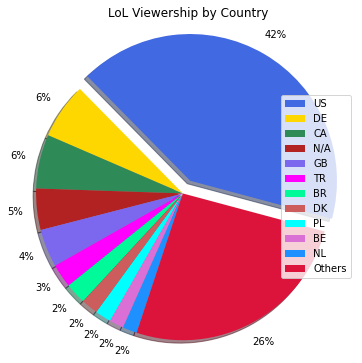

<Figure size 432x288 with 0 Axes>

In [9]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize = (6, 6))

plt.pie(countries, explode = explode, colors = colors, shadow = True, startangle = 345, autopct = '%1.0f%%', pctdistance = 1.15)
plt.legend(labels, loc = 'right')
plt.title('LoL Viewership by Country')
plt.axis('equal')
plt.show()
plt.clf()

Create lists for hours and number of US viewers for each hour

In [10]:
hour = range(24)
viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

Create line graph to show viewership per hour with a 15% error bar (some users leave browsers open)

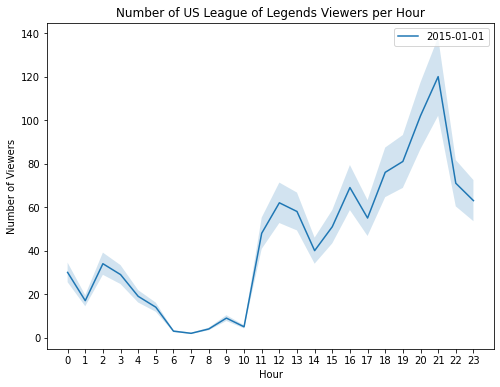

<Figure size 432x288 with 0 Axes>

In [11]:
y_upper = [i + (i*0.15) for i in viewers_hour]
y_lower = [i - (i*0.15) for i in viewers_hour]

plt.figure(figsize = (8, 6))

plt.plot(hour, viewers_hour)
plt.title('Number of US League of Legends Viewers per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Viewers')
plt.legend(['2015-01-01'])
plt.fill_between(hour, y_lower, y_upper, alpha = 0.2)
ax = plt.subplot()
ax.set_xticks(hour)
plt.show()
plt.clf()

Complete same graphs with results from SQL query project

In [12]:
#Import query results for games and number of viewers

from sqlite3 import connect

con = connect('twitch.db')
cur = con.cursor()

query4 = ''
with open('4.sql', 'r') as sql_file:
    for line in sql_file:
        query4 += line


results4 = cur.execute(query4).fetchall()

In [13]:
#Save as list of two lists instead of list of tuples

results4 = list(map(list, zip(*results4)))

In [14]:
#Save as two separate lists

game_list = results4[0]
game_list[13] = 'None'
viewer_list = results4[1]

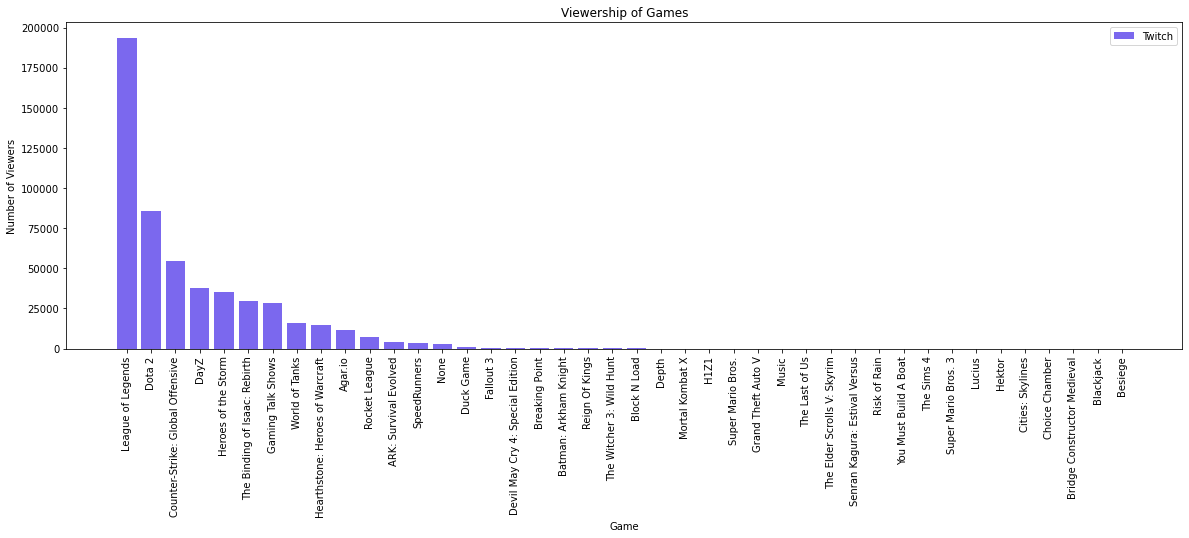

<Figure size 432x288 with 0 Axes>

In [15]:
#Plot bar chart of viewers for each game

plt.figure(figsize = (20, 6))

plt.bar(range(len(game_list)), viewer_list, color = 'mediumslateblue')
plt.title('Viewership of Games')
plt.xlabel('Game')
plt.ylabel('Number of Viewers')
plt.legend(['Twitch'])
ax = plt.subplot()
ax.set_xticks(range(len(game_list)))
ax.set_xticklabels(game_list, rotation = 90)
plt.show()
plt.clf()

In [16]:
#Import query results for viewership by country

query5 = ''
with open('5.sql', 'r') as sql_file:
    for line in sql_file:
        query5 += line


results5 = cur.execute(query5).fetchall()

In [17]:
#Save results as a list of two lists instead of list of tuples

results5 = list(map(list, zip(*results5)))

In [18]:
#Save results as two separate lists

country_names = results5[0]
viewership = results5[1]

country_names_10 = country_names[:10]
country_names_10[6] = 'None'
viewership_10 = viewership[:10]

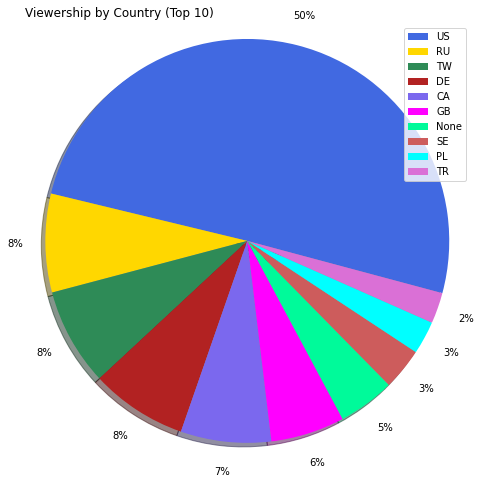

<Figure size 432x288 with 0 Axes>

In [19]:
#Pie chart of viewers by country

plt.figure(figsize = (8, 8))

plt.pie(viewership_10, colors = colors, shadow = True, startangle = 345, autopct = '%1.0f%%', pctdistance = 1.15)
plt.legend(country_names_10, loc = 'upper right')
plt.title('Viewership by Country (Top 10)', loc = 'left')
plt.axis('equal')
plt.show()
plt.clf()

In [20]:
#Import query results for viewers per hour

query10 = ''
with open('10.sql', 'r') as sql_file:
    for line in sql_file:
        query10 += line


results10 = cur.execute(query10).fetchall()

In [21]:
#Save results as list of two lists instead of list of tuples

results10 = list(map(list, zip(*results10)))

In [22]:
#Save results as two separate lists

times = results10[0]
viewers_time = results10[1]

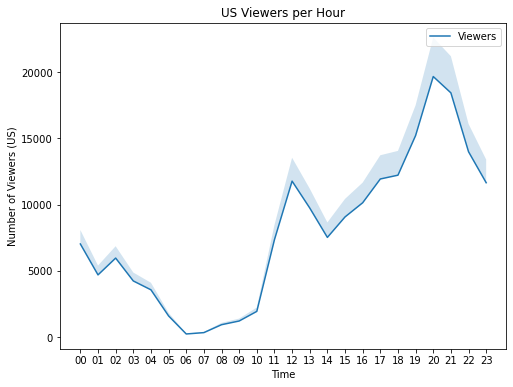

<Figure size 432x288 with 0 Axes>

In [23]:
#Plot viewership per hour with +- 15% to account for unwatched browsers

y_upper = [i + 0.15*i for i in viewers_time]
y_lower = [i - 0.15*1 for i in viewers_time]

plt.figure(figsize = (8, 6))

plt.plot(times, viewers_time)
plt.fill_between(times, y_lower, y_upper, alpha = 0.2)
plt.title('US Viewers per Hour')
plt.xlabel('Time')
plt.ylabel('Number of Viewers (US)')
plt.legend(['Viewers'])
ax = plt.subplot()
ax.set_xticks(times)
ax.set_xticklabels(times)
plt.show()
plt.clf()